In [963]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import plotly.express as px
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [1003]:
movie_df = pd.read_csv('C:\\Users\\DELL\\Desktop\\Tasks\\Task 2\\IMDb Movies India.csv', 
                 encoding='ISO-8859-1')
movie_df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Rating'}>]], dtype=object)

<Figure size 400x300 with 0 Axes>

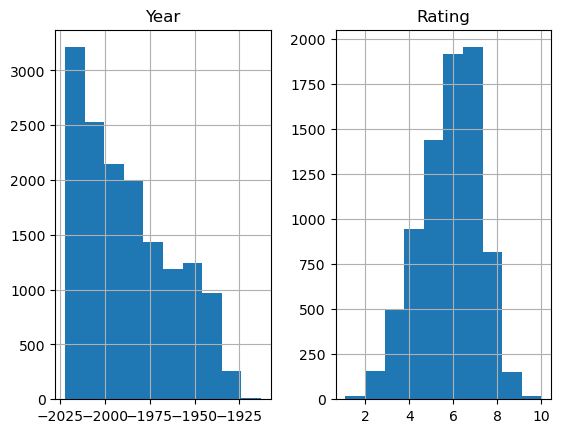

In [1004]:
plt.figure(figsize = (4, 3))
movie_df.hist()

In [1005]:
movie_df.shape

(15509, 10)

In [1006]:
movie_df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [1007]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


### Basic understanding of `IMDb Movies India` dataset

1. Only two columns have numeric data type.
2. Name column has alot rough and duplicate values.
3. Year column has minus values.
4. Duration column must have numeric datatype not object.
5. Genre column have muliple Genre types.
6. Rating and Votes columns have same null values, may be both columns depend on each other. Null values in these columns means no one cast the vote or gave the rating to movie that's why it's null.
7. Director, Actor 1, Actor 2, Actor 3 have null values as well.

In [1008]:
# Unique values in each column
for columns in movie_df.columns:
    print(f'Column: {columns}')
    print(movie_df[columns].unique())
    print("------------------------------")

Column: Name
[' ' 'Gadhvi (He thought he was Gandhi)' 'Homecoming' ... 'Zulmi Raj'
 'Zulmi Shikari' 'Zulm-O-Sitam']
------------------------------
Column: Year
[   nan -2019. -2021. -2010. -1997. -2005. -2008. -2012. -2014. -2004.
 -2016. -1991. -1990. -2018. -1987. -1948. -1958. -2017. -2020. -2009.
 -2002. -1993. -1946. -1994. -2007. -2013. -2003. -1998. -1979. -1951.
 -1956. -1974. -2015. -2006. -1981. -1985. -2011. -2001. -1967. -1988.
 -1995. -1959. -1996. -1970. -1976. -2000. -1999. -1973. -1968. -1943.
 -1953. -1986. -1983. -1989. -1982. -1977. -1957. -1950. -1992. -1969.
 -1975. -1947. -1972. -1971. -1935. -1978. -1960. -1944. -1963. -1940.
 -1984. -1934. -1955. -1936. -1980. -1966. -1949. -1962. -1964. -1952.
 -1933. -1942. -1939. -1954. -1945. -1961. -1965. -1938. -1941. -1931.
 -1937. -2022. -1932. -1923. -1915. -1928. -1922. -1917. -1913. -1930.
 -1926. -1914. -1924.]
------------------------------
Column: Duration
[nan '109 min' '90 min' '110 min' '105 min' '147 min' '142 

In [1009]:
# Duplicate Values in each column
for columns in movie_df.select_dtypes('O'):
    print(f'Column: {columns}')
    print(movie_df[columns].duplicated().sum())
    print("---------------------------------")

Column: Name
1672
---------------------------------
Column: Duration
15326
---------------------------------
Column: Genre
15023
---------------------------------
Column: Votes
13474
---------------------------------
Column: Director
9570
---------------------------------
Column: Actor 1
10790
---------------------------------
Column: Actor 2
10617
---------------------------------
Column: Actor 3
10688
---------------------------------


#### Data Cleaning

In [1010]:
# Dropping all the null values except Genre Column
movie_df.dropna(subset=['Name', 'Year', 'Duration', 'Rating'
                        ,'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], inplace = True)

In [1011]:
# Name 
movie_df['Name'] = movie_df['Name'].str.replace(r'([^a-zA-z\s\'\-]+)', '', regex = True)

# Year 
movie_df['Year'] = movie_df['Year'].abs().astype('Int64')

# Duration 
movie_df['Duration'] = pd.to_numeric(movie_df['Duration'].str.replace(r'min', ''))


In [1012]:
# Genre
movie_df['Genre'] = movie_df['Genre'].str.split(', ').explode('Genre')
movie_df['Genre'].fillna(movie_df['Genre'].mode()[0], inplace = True)

In [1013]:
# Votes
movie_df['Votes'] = pd.to_numeric(movie_df['Votes'].str.replace(r',', '', regex = True))

In [1014]:
movie_df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

#### Handling duplicate values

In [1015]:
# Overall duplicates
movie_df.duplicated().sum()

0

In [1016]:
# Name column duplicates
movie_df['Name'].duplicated().sum()

300

In [1017]:
# drop all "Name" column Duplicates
movie_df.drop_duplicates(subset= 'Name', inplace = True)

In [1018]:
movie_df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,Gadhvi He thought he was Gandhi,2019,109,Comedy,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,Aur Pyaar Ho Gaya,1997,147,Musical,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,Yahaan,2005,142,Drama,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,A Question Mark,2012,82,War,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [1019]:
movie_df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [1020]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5388 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5388 non-null   object 
 1   Year      5388 non-null   Int64  
 2   Duration  5388 non-null   int64  
 3   Genre     5388 non-null   object 
 4   Rating    5388 non-null   float64
 5   Votes     5388 non-null   int64  
 6   Director  5388 non-null   object 
 7   Actor 1   5388 non-null   object 
 8   Actor 2   5388 non-null   object 
 9   Actor 3   5388 non-null   object 
dtypes: Int64(1), float64(1), int64(2), object(6)
memory usage: 468.3+ KB


### Analyze data and provide some trends.
Year with best rating.

Does length of movie have any impact with the rating?

Top 10 movies according to rating per year and overall.

Number of popular movies released each year.

Counting the number of votes which movies preformed better in rating per year and overall.

Any other trends or future prediction you may have

Which director directed the most movies

Which actor starred in the movie

Any other trends you can find


### !Remider: 
   all these trends have taken from kaggle which were avaiable with the dataset
   
link: https://www.kaggle.com/datasets/adrianmcmahon/imdb-india-movies

#### 1. Year with best rating. 

In [1021]:
year_best_rating = movie_df.loc[movie_df['Rating'] == movie_df['Rating'].max()]
year_best_rating[['Year', 'Rating']]

,Year,Rating
8339,2020,10.0


#### 2. Does length of movie have any impact with the rating?

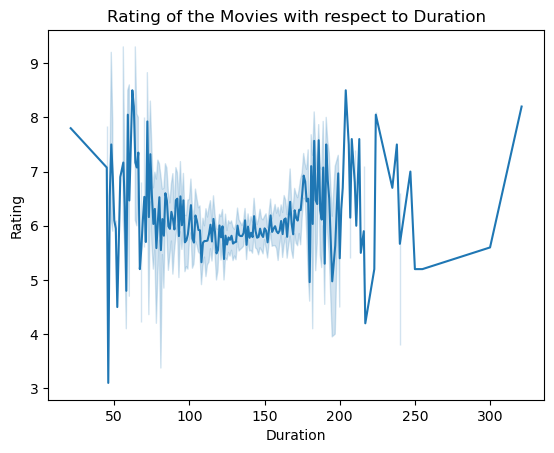

In [858]:
sb.lineplot(x= "Duration", y = 'Rating', data = movie_df)
plt.title('Rating of the Movies with respect to Duration')
plt.show()

#### 3. Top 10 movies according to rating per year and overall.

In [1022]:
year_df = movie_df.groupby('Year')['Rating'].mean().reset_index()

# per_year 
per_year = year_df.nlargest(10, 'Rating')
print("Top 10 Movies Per Year:")
per_year

Top 10 Movies Per Year:


,Year,Rating
13,1944,7.350000
21,1952,7.212500
26,1957,7.089286
22,1953,7.078947
18,1949,6.958333
15,1946,6.933333
17,1948,6.933333
9,1940,6.883333
29,1960,6.824000
30,1961,6.808696


In [1023]:
# overall Top 10 movies according to the Rating
overall_10 = movie_df.nlargest(10, 'Rating')
overall_10[['Name','Year', 'Rating']]

,Name,Year,Rating
8339,Love Qubool Hai,2020,10.0
5410,Half Songs,2021,9.7
5077,Gho Gho Rani,2019,9.4
6852,June,2021,9.4
14222,The Reluctant Crime,2020,9.4
1314,Ashok Vatika,2018,9.3
1729,Baikunth,2021,9.3
5125,God of gods,2019,9.3
8344,Love Sorries,2021,9.3
11843,Reflct,2021,9.3


#### 4.Number of popular movies released each year.

In [1024]:
popular_movies = movie_df[movie_df['Votes'] >= movie_df['Votes'].max()]

# Group the popular movies by year and count the number of movies in each group
popular_movies_count = popular_movies.groupby('Year').size()

print("Number of Popular Movies Released Each Year:")
popular_movies_count

Number of Popular Movies Released Each Year:


Year
2012    1
dtype: int64

#### 5. Counting the number of votes which movies preformed better in rating per year and overall.

In [1025]:
year_df = movie_df.groupby(['Year'])

# per_year 
per_year_rating = []
for year, group in year_df:
    top_10_peryear_rate = group.nlargest(10, 'Rating')
    per_year_rating.append(top_10_peryear_rate)
each_year_rating = pd.concat(per_year_rating)

# Get the highest voting movie from the highest rating per year dataset
each_year_rating = each_year_rating[each_year_rating['Votes'] == each_year_rating['Votes'].max()]
print('Highest rating with the maximum Votes:')
each_year_rating[['Name', 'Year', 'Rating', 'Votes']]


Highest rating with the maximum Votes:


,Name,Year,Rating,Votes
75,Idiots,2009,8.4,357889


In [1026]:
# Find the overall best movie with the highest votes
overall_best_vote = movie_df.loc[movie_df['Votes'].idxmax()]
print("Best Movie Overall:")
overall_best_vote[['Name', 'Year', 'Rating', 'Votes']]

Best Movie Overall:


Name      Life of Pi
Year            2012
Rating           7.9
Votes         591417
Name: 8219, dtype: object

In [1027]:
# Find the overall movie with the lowest votes
overall_lowest_vote = movie_df.loc[movie_df['Votes'].idxmin()]
print("Best Movie Overall:")
overall_lowest_vote[['Name', 'Year', 'Rating', 'Votes']]

Best Movie Overall:


Name      Anmol Sitaare
Year               1982
Rating              7.0
Votes                 5
Name: 1116, dtype: object

In [1028]:
# Find the overall highest rating movie name
max_rating_overall = movie_df[movie_df['Rating'] == movie_df['Rating'].max()]
max_rating_name = max_rating_overall[['Name', 'Year', 'Rating', 'Votes']]
max_rating_name

,Name,Year,Rating,Votes
8339,Love Qubool Hai,2020,10.0,5


In [1029]:
# Find the overall lowest rating movie name
min_rating_overall = movie_df[movie_df['Rating'] == movie_df['Rating'].min()]
min_rating_name = min_rating_overall[['Name', 'Year', 'Rating', 'Votes']]
min_rating_name

,Name,Year,Rating,Votes
12171,Sadak,2020,1.1,67785


#### 6. Which director directed highest & lowest movies the movies

In [1030]:
# most movies 
most_movies_director = movie_df['Director'].value_counts()
most_movies_director.idxmax()

'David Dhawan'

In [1031]:
# least movies
min_movies_director = movie_df['Director'].value_counts()
min_movies_director.idxmin()

'Bharathan'

#### Visualization

In [1032]:
fig = px.histogram(movie_df, x='Year', title='Distribution of Movie Release Years')

fig.update_layout(
    xaxis_title='Year',      
    yaxis_title='Frequency',
    bargap=0.05,             
    showlegend=False,     
)
fig.show()

In [807]:
fig = px.histogram(movie_df, x='Duration', title='Distribution of Movie Release Duration')

fig.update_layout(
    xaxis_title='Duration',      
    yaxis_title='Frequency',
    bargap=0.05,             
    showlegend=False,     
)
fig.show()

In [808]:
fig = px.histogram(movie_df, x='Rating', title='Distribution of Rating ')

fig.update_layout(
    xaxis_title='Rating',      
    yaxis_title='Count',
    bargap=0.05,             
    showlegend=False,     
)
fig.show()

In [809]:
fig = px.scatter(movie_df, x='Votes', title='Distribution of Votes')

fig.update_layout(
    xaxis_title='Votes',      
    yaxis_title='Count',
    bargap=0.05,             
    showlegend=False,     
)
fig.show()

In [1063]:
year_df = movie_df.groupby('Year')['Rating'].mean().reset_index()
top_10_ratings = year_df.nlargest(20, 'Rating')
fig = px.scatter(top_10_ratings, x='Year', y='Rating',
    title='Top 20 Ratings Over the Years ', color = 'Rating',
    labels={'Rating': 'Movie Rating', 'Year': 'Release Year'},

) 
fig.update_layout(
    xaxis_title='Release Year',
    yaxis_title='Number of Movies',
    legend_title_text='Rating',
    showlegend=True,
    bargap=0.05,             
)

# Show the plot
fig.show()


In [1064]:
overall_top_10_ratings = movie_df.nlargest(20, 'Rating')
fig = px.scatter(overall_top_10_ratings, x='Year', y='Rating',
    title='Top 20 Overall Ratings ', color = 'Rating',
    labels={'Rating': 'Movie Rating', 'Year': 'Release Year'},

) 
fig.update_layout(
    xaxis_title='Release Year',
    yaxis_title='Number of Movies',
    legend_title_text='Rating',
    showlegend=True,
    bargap=0.05,             
)

# Show the plot
fig.show()

In [1066]:
year_df = movie_df.groupby('Year')['Votes'].mean().reset_index()
top_10_ratings = year_df.nlargest(20, 'Votes')
fig = px.scatter(top_10_ratings, x='Year', y='Votes',
    title='Top 20 Votes Over the Years ', color = 'Votes',
    labels={'Rating': 'Movie Votes', 'Year': 'Release Year'},

) 
fig.update_layout(
    xaxis_title='Release Year',
    yaxis_title='Number of Votes',
    legend_title_text='Votes',
    showlegend=True,
    bargap=0.05,             
)

# Show the plot
fig.show()

In [1067]:
overall_top_10_ratings = movie_df.nlargest(20, 'Votes')
fig = px.scatter(overall_top_10_ratings, x='Year', y='Votes',
    title='Top 20 Overall Votes ', color = 'Votes',
    labels={'Rating': 'Movie Votes', 'Year': 'Release Year'},

) 
fig.update_layout(
    xaxis_title='Release Year',
    yaxis_title='Number of Movies',
    legend_title_text='Votes',
    showlegend=True,
    bargap=0.05,             
)

# Show the plot
fig.show()

In [814]:
fig = px.scatter(movie_df, x='Duration', y='Rating', title='Movie Duration vs. Rating')

fig.update_layout(
    xaxis_title='Duration (minutes)',
    yaxis_title='Rating',
    showlegend=False,
    plot_bgcolor='white',  
    paper_bgcolor='white',
)

fig.show()

In [815]:
fig = px.scatter(movie_df, x='Duration', y='Votes', title='Movie Duration vs. Votes')

fig.update_layout(
    xaxis_title='Duration (minutes)',
    yaxis_title='Votes',
    showlegend=False,
    plot_bgcolor='white',  
    paper_bgcolor='white',
)

fig.show()

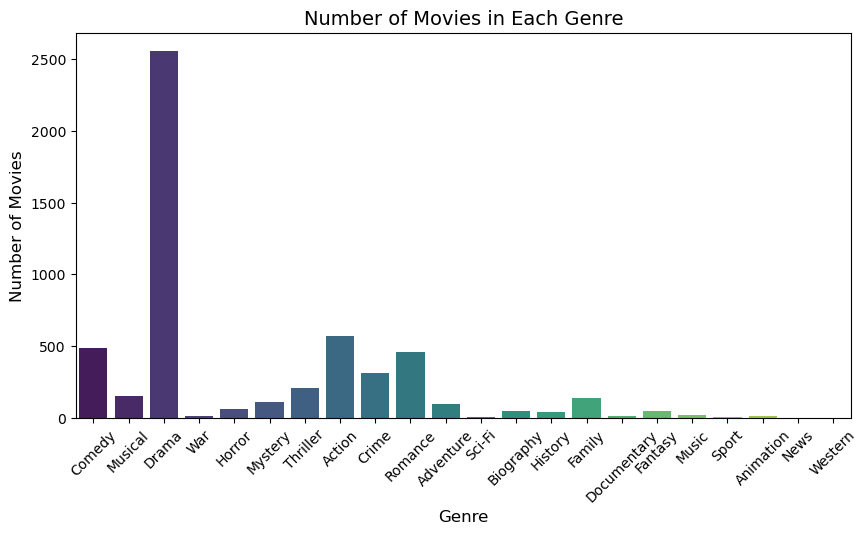

In [816]:
plt.figure(figsize=(10, 5))
sb.countplot(data= movie_df, x='Genre', palette='viridis')

plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.title('Number of Movies in Each Genre', fontsize=14)

plt.xticks(rotation=45)
plt.show()

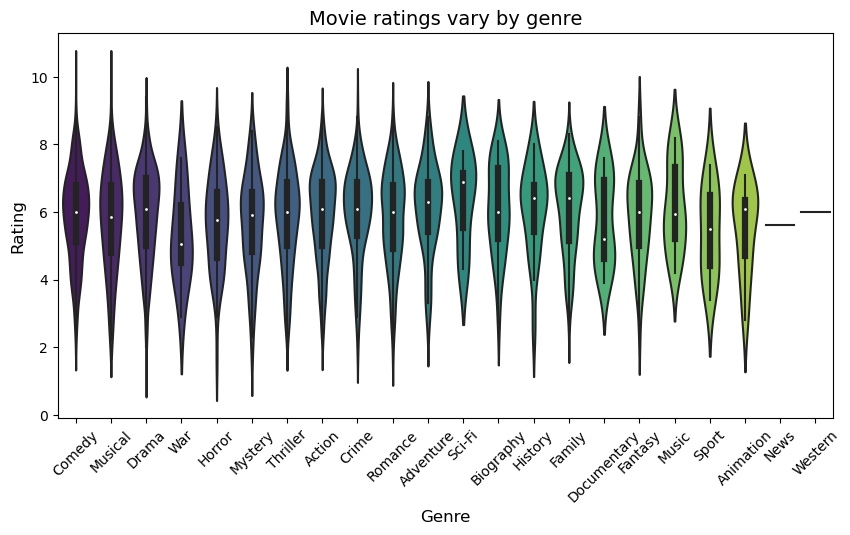

In [817]:
plt.figure(figsize=(10, 5))
sb.violinplot(data= movie_df, x='Genre',y = 'Rating', palette='viridis')

plt.xlabel('Genre', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.title('Movie ratings vary by genre', fontsize=14)

plt.xticks(rotation=45)
plt.show()

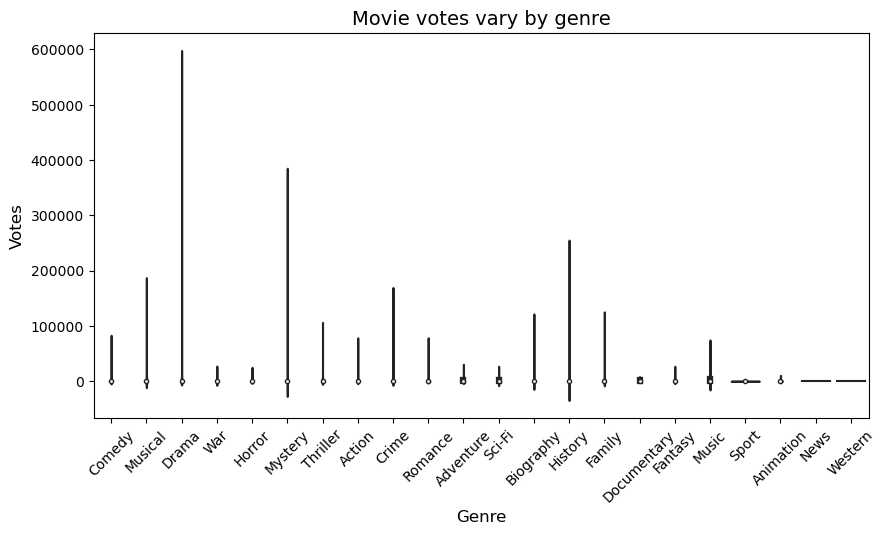

In [818]:
plt.figure(figsize=(10, 5))
sb.violinplot(data= movie_df, x='Genre',y = 'Votes', palette='viridis')

plt.xlabel('Genre', fontsize=12)
plt.ylabel('Votes', fontsize=12)
plt.title('Movie votes vary by genre', fontsize=14)

plt.xticks(rotation=45)
plt.show()

In [819]:
year_df = movie_df.groupby('Year')['Rating'].mean().reset_index()
fig = px.line(year_df, x='Year', y='Rating',
    title='Any Rating Trends in across year?',
    labels={'Rating': 'Movie Rating', 'Year': 'Release Year'},

) 
fig.update_layout(
    xaxis_title='Release Year',
    yaxis_title='Number of Movies',
    showlegend=True,           
)

# Show the plot
fig.show()

In [820]:
year_df = movie_df.groupby('Year')['Votes'].mean().reset_index()
fig = px.line(year_df, x='Year', y='Votes',
    title='Any Voting Trends in across year?',
    labels={'Votes': 'Movie Rating', 'Year': 'Release Year'},

) 
fig.update_layout(
    xaxis_title='Release Year',
    yaxis_title='Number of Movies',
    showlegend=True,           
)

# Show the plot
fig.show()

#### Feature Engineering

I have numerous options to handle the categorical for the model
1. One-Hot Encoding
2. Label Encoding
3. Target Encoding
4. Feature Hashing

In [1033]:
# Genre
mean_ratings_by_genre = movie_df.groupby('Genre')['Rating'].mean().to_dict()
movie_df['Genre_Mean_Rating'] = movie_df['Genre'].map(mean_ratings_by_genre)

# Director
mean_ratings_by_director = movie_df.groupby('Director')['Rating'].mean().to_dict()
movie_df['Director_mean_Rating'] = movie_df['Director'].map(mean_ratings_by_director)

# Actor 1
mean_ratings_by_actor1 = movie_df.groupby('Actor 1')['Rating'].mean().to_dict()
movie_df['Actor1_mean_Rating'] = movie_df['Actor 1'].map(mean_ratings_by_actor1)

# Actor 2
mean_ratings_by_actor2 = movie_df.groupby('Actor 2')['Rating'].mean().to_dict()
movie_df['Actor2_mean_Rating'] = movie_df['Actor 2'].map(mean_ratings_by_actor2)

# Actor 3
mean_ratings_by_actor3 = movie_df.groupby('Actor 3')['Rating'].mean().to_dict()
movie_df['Actor3_mean_Rating'] = movie_df['Actor 3'].map(mean_ratings_by_actor3)

movie_df.head(3)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_Mean_Rating,Director_mean_Rating,Actor1_mean_Rating,Actor2_mean_Rating,Actor3_mean_Rating
1,Gadhvi He thought he was Gandhi,2019,109,Comedy,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,5.879218,7.0,6.850000,7.000000,7.000000
3,Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.879218,4.4,5.420000,4.400000,4.450000
5,Aur Pyaar Ho Gaya,1997,147,Musical,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,5.742105,5.2,4.885714,5.786667,5.872727


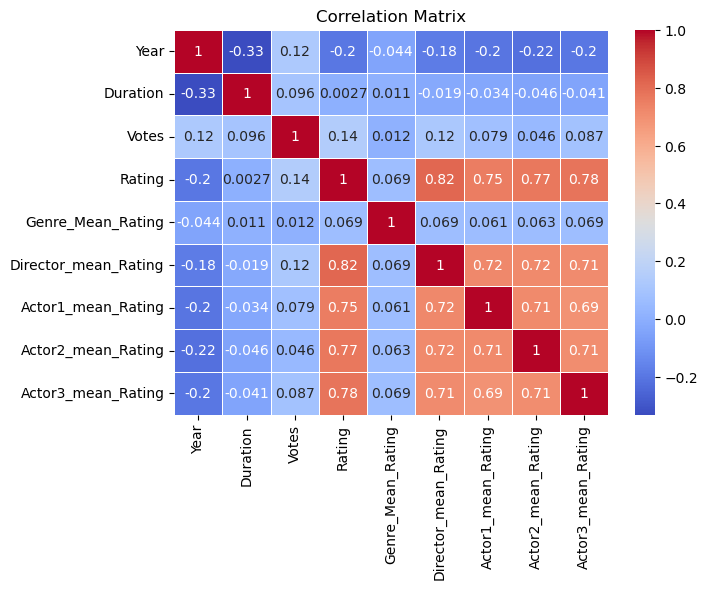

In [1069]:
correlation_matrix = movie_df[['Year', 'Duration', 'Votes','Rating', 'Genre_Mean_Rating',
       'Director_mean_Rating', 'Actor1_mean_Rating', 'Actor2_mean_Rating',
       'Actor3_mean_Rating']]
plt.figure(figsize=(7, 5))
sb.heatmap(correlation_matrix.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [1037]:
X = movie_df[['Year', 'Duration', 'Votes', 'Genre_Mean_Rating','Director_mean_Rating', 
              'Actor1_mean_Rating', 'Actor2_mean_Rating','Actor3_mean_Rating']]
y = movie_df['Rating']

In [1038]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4310, 8)
(4310,)
(1078, 8)
(1078,)


#### Models

In [1039]:
# Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)
y_pred_linear = linear_regressor.predict(x_test)

In [1040]:
# Decision Tree Regression
tree_regressor = DecisionTreeRegressor(max_depth= 3)
tree_regressor.fit(x_train, y_train)
y_tree_pred = tree_regressor.predict(x_test)

In [1041]:
# Random Forest Regression
forest_regressor = RandomForestRegressor(n_estimators= 1500)
forest_regressor.fit(x_train, y_train)
y_forest_pred = forest_regressor.predict(x_test)

#### Evaluate the model

In [1043]:
# MSE, MAE, R2 of models

# linear
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_mae = mean_absolute_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)
print("Linear Regression................")
print(f"Mean Squared Error (MSE): {linear_mse}")
print(f"Mean Absolute Error (MAE): {linear_mae}")
print(f"R-squared (R2) Score: {linear_r2}")

# Decision Tree
tree_mse = mean_squared_error(y_test, y_tree_pred)
tree_mae = mean_absolute_error(y_test, y_tree_pred)
tree_r2 = r2_score(y_test, y_tree_pred)
print("\nDecision Tree................")
print(f"Mean Squared Error (MSE): {tree_mse}")
print(f"Mean Absolute Error (MAE): {tree_mae}")
print(f"R-squared (R2) Score: {tree_r2}")


# Random Forest Regression 
random_mse = mean_squared_error(y_test, y_forest_pred)
random_mae = mean_absolute_error(y_test, y_forest_pred)
random_r2 = r2_score(y_test, y_forest_pred)
print("\nRandom Forest................")
print(f"Mean Squared Error (MSE): {random_mse}")
print(f"Mean Absolute Error (MAE): {random_mae}")
print(f"R-squared (R2) Score: {random_r2}")


Linear Regression................
Mean Squared Error (MSE): 0.41476156507095774
Mean Absolute Error (MAE): 0.46796252557323786
R-squared (R2) Score: 0.7785504924254887

Decision Tree................
Mean Squared Error (MSE): 0.6775168598949395
Mean Absolute Error (MAE): 0.5958944523146508
R-squared (R2) Score: 0.6382601773346688

Random Forest................
Mean Squared Error (MSE): 0.3487005056441967
Mean Absolute Error (MAE): 0.38590228818800343
R-squared (R2) Score: 0.8138218153056693


In [1051]:
# Predict using Dummy Data
dummy_data = {
    'Year': [2022],  
    'Duration': [120],  
    'Votes': [1000],  
    'Genre_Mean_Rating': [4.5],  
    'Director_mean_Rating': [4.0], 
    'Actor1_mean_Rating': [4.2],  
    'Actor2_mean_Rating': [4.1],  
    'Actor3_mean_Rating': [3.9]  
}

dummy_df = pd.DataFrame(dummy_data)
print('Linear Regression: ',linear_regressor.predict(dummy_df.values))
print('Decision Tree: ',tree_regressor.predict(dummy_df.values))
print('Random Forest: ',forest_regressor.predict(dummy_df.values))

Linear Regression:  [3.54363675]
Decision Tree:  [4.22621359]
Random Forest:  [4.0166]


In [1071]:
# Visualization of all Data Points Prediction in 3 models
predictions_df = pd.DataFrame({
    'Linear Regression': y_pred_linear,
    'Decision Tree': y_tree_pred,
    'Random Forest': y_forest_pred
})
fig = px.line(predictions_df, title='Regression Model Comparisons',
              labels={'index': 'Data Point'},
              template='plotly_dark')

fig.update_traces(
    mode='lines+markers'
)

fig.show()